In [25]:
import pandas as pd 
import numpy as np
import quandl 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [17]:
start_date = '1980-01-01'
end_date = '2017-10-09'

In [40]:
# import data 

# stock price 
ticker = 'AAPL'
stkname = "WIKI/" + str(ticker)
df01 = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= '1980-01-01',
                        end_date='2017-10-09')

df01 = df01[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df01 = df01.rename(columns={"Adj. Open": "open", "Adj. High": "high", "Adj. Low": "low",
                                "Adj. Close": "close", "Adj. Volume": "volume"})
df01['date'] = df01.index

# mortgage rate 
df_rate = quandl.get("FMAC/30US", authtoken="-Cd2GkPqwZYD7_NNFF4K")
start_date = df_rate.index.min() - pd.DateOffset(day=1)
end_date = df_rate.index.max() + pd.DateOffset(day=31)
dates = pd.date_range(start_date, end_date, freq='D')
dates.name = 'date'
df_rate = df_rate.reindex(dates, method='ffill')
rate_columns = df_rate.columns
df_rate['date'] =df_rate.index

# VIX price 
df_vix_1 = quandl.get("CHRIS/CBOE_VX1", authtoken="-Cd2GkPqwZYD7_NNFF4K")
df_vix_1['date'] = df_vix_1.index

df = pd.merge(pd.merge(df01, df_rate,  on = 'date'), df_vix_1, on = 'date')


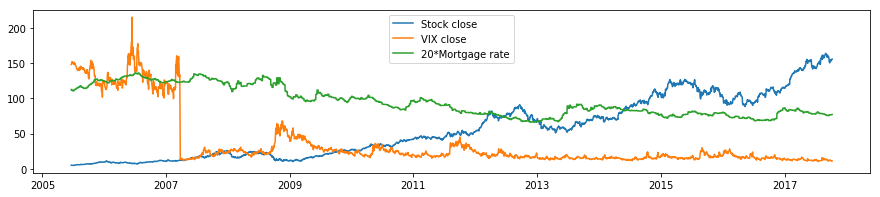

In [41]:
# plot

plt.figure(figsize = (15, 3))
plt.plot(df['date'], df['close'])
plt.plot(df['date'], df['Close'])
plt.plot(df['date'], 20*df['Value'])
plt.legend(['Stock close', 'VIX close', '20*Mortgage rate'])

In [42]:
df.head()

,open,high,low,close,volume,date,Value,Open,High,Low,Close,Settle,Change,Total Volume,EFP,Prev. Day Open Interest
0,4.864253,4.895096,4.812847,4.833409,80929100.0,2005-06-20,5.63,148.3,148.3,148.3,148.3,148.3,148.3,0.0,0.0,0.0
1,4.844975,4.907947,4.803851,4.865538,92631700.0,2005-06-21,5.63,149.0,149.0,149.0,149.0,149.1,0.8,50.0,0.0,50.0
2,4.916943,4.960638,4.901522,4.954212,106231300.0,2005-06-22,5.63,148.4,148.4,148.4,148.4,148.6,-0.5,10.0,0.0,60.0
3,4.990196,5.112284,4.967064,4.997907,168563500.0,2005-06-23,5.57,149.8,150.5,149.1,150.5,151.2,2.6,61.0,0.0,121.0
4,5.023610,5.027465,4.842405,4.852686,102677400.0,2005-06-24,5.57,150.9,152.0,150.5,152.0,152.7,1.5,9.0,0.0,117.0


In [43]:
# data preprocessing 

df['MA'] = df['close'].rolling(window=self.paras.pred_len, center=False).mean()





# y = np.array(df['label'])
# X_price, X_volume = self.divide_into_price_volume(df.drop(featureDropForTraining, 1))

# X_price, scaler_price = self.preprocessing_data_by_row(X_price)
# X_volume, scaler_volume = self.preprocessing_data_by_row(X_volume)

# # combine price and volume - rearrange
# # [...,o_-10_d,h_-10_d,l_-10_d,c_-10_d,...], [...,v_-10_d,...] -> [..., o_-10_d,h_-10_d,l_-10_d,c_-10_d,v_-10_d,...]
# X_combined = self.combine_price_volume(X_price, X_volume)

NameError: name 'self' is not defined

In [105]:
tks = ['AAPL', 'GOOGL']

d = {}
for i in tks:
    stkname = "WIKI/" + str(i)
    d[i] = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= '1980-01-01',
                            end_date='2017-10-09')

    d[i] = d[i][['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
    d[i] = d[i].rename(columns={"Adj. Open": str(i) + '_' + "open", "Adj. High": str(i) + '_' + "high", "Adj. Low": str(i) + '_'+ "low",
                                    "Adj. Close": str(i) + '_'+ "close", "Adj. Volume": str(i) + '_'+"volume"})
    #['date'] = d.index
    d[i]['date'] = d[i].index

In [114]:
# for i in tks:
#     pd.merge(d[i], on = 'date')

In [116]:
for i in tks:
    dd = pd.concat([d[i]])
    
    

,AAPL_open,AAPL_high,AAPL_low,AAPL_close,AAPL_volume,date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume
0,2.024737,2.047227,1.950842,1.973332,97230000.0,2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
1,1.973332,1.991323,1.959195,1.979115,79195200.0,2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2,1.982970,2.009315,1.966263,1.997107,63665000.0,2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2.008673,2.053010,2.004175,2.053010,93534000.0,2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2.050440,2.130119,2.038874,2.123693,126404600.0,2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [127]:
ref_tks = ['AMZN', 'GOOGL']

d = []
for i in ref_tks:
    stkname = "WIKI/" + str(i)
    t = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= '1980-01-01',
                            end_date='2017-10-09')

    t = t[[ 'Adj. Close']]
    t = t.rename(columns={"Adj. Close": str(i) + '_'+ "close"})
    d.append(t)
df_ref = pd.concat(d, axis = 1)

In [128]:
pd.concat(d, axis = 1)

,AMZN_close,GOOGL_close
Date,,
1997-05-16,1.729167,NaN
1997-05-19,1.708333,NaN
1997-05-20,1.635833,NaN
1997-05-21,1.427500,NaN
1997-05-22,1.395833,NaN
1997-05-23,1.500000,NaN
1997-05-27,1.583333,NaN
1997-05-28,1.531667,NaN
1997-05-29,1.505000,NaN


In [130]:
d['AMAZ']

TypeError: list indices must be integers or slices, not str

In [124]:
df.head()

,AAPL_close,AAPL_volume,GOOGL_close,GOOGL_volume
Date,,,,
1980-12-12,0.422706,117258400.0,NaN,NaN
1980-12-15,0.400652,43971200.0,NaN,NaN
1980-12-16,0.371246,26432000.0,NaN,NaN
1980-12-17,0.380362,21610400.0,NaN,NaN
1980-12-18,0.391536,18362400.0,NaN,NaN


In [134]:
stkname = "WIKI/" + str(ticker)
        # df = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date=self.paras.start_date,
        #                 end_date=self.paras.end_date)
        # df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
        # df = df.rename(columns={"Adj. Open": "open", "Adj. High": "high", "Adj. Low": "low",
        #                         "Adj. Close": "close", "Adj. Volume": "volume"})

        ### add more data from here 

        # get data for stock price 
df01 = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= '1980-01-01',
                            end_date='2017-10-09')
df01 = df01[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df01 = df01.rename(columns={"Adj. Open": "open", "Adj. High": "high", "Adj. Low": "low",
                                "Adj. Close": "close", "Adj. Volume": "volume"})
df01['date'] = df01.index
        
ref_tks = ['AMZN', 'GOOGL']

d = []
for i in ref_tks:
    stkname = "WIKI/" + str(i)
    t = quandl.get(stkname, authtoken='2c24stWyXfdzLVFWxGe4', start_date= '1980-01-01',
                                    end_date='2017-10-09')

    t = t[[ 'Adj. Close']]
    t = t.rename(columns={"Adj. Close": str(i) + '_'+ "close"})
    t['date'] = t.index
    d.append(t)
df_ref = pd.concat(d, axis = 1)
        # get data for VIX 

        # df_vix_1 = quandl.get("CHRIS/CBOE_VX1", authtoken="-Cd2GkPqwZYD7_NNFF4K")
        # df_vix_1['date'] = df_vix_1.index


df = pd.concat([df01, df_ref], axis = 1, join = 'inner')

In [136]:
df.tail()

,open,high,low,close,volume,date,AMZN_close,date,GOOGL_close,date
Date,,,,,,,,,,
2017-10-03,154.01,155.09,153.910,154.4800,16146388.0,2017-10-03,957.10,2017-10-03,972.08,2017-10-03
2017-10-04,153.63,153.86,152.460,153.4508,19844177.0,2017-10-04,965.45,2017-10-04,966.78,2017-10-04
2017-10-05,154.18,155.44,154.050,155.3900,21032800.0,2017-10-05,980.85,2017-10-05,985.19,2017-10-05
2017-10-06,154.97,155.49,154.560,155.3000,16423749.0,2017-10-06,989.58,2017-10-06,993.64,2017-10-06
2017-10-09,155.81,156.73,155.485,155.8400,16200129.0,2017-10-09,990.99,2017-10-09,992.31,2017-10-09
